# Compiler

In [ ]:
%pip install quantpiler==0.1.6

In [1]:
from quantpiler.compiler import compile

## Basics

<qiskit.circuit.quantumregister.Qubit object at 0x7f1154442900> = False
<qiskit.circuit.quantumregister.Qubit object at 0x7f1154443040> = True


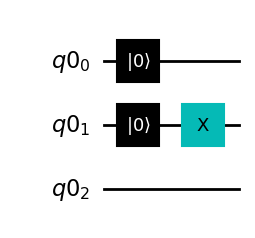

In [2]:
def assigment_func(a, b, c):
    a = False
    b = True

qc = compile(assigment_func, 0)
qc.draw(output="mpl")

<qiskit.circuit.quantumregister.Qubit object at 0x7f115453db40> = True
<qiskit.circuit.quantumregister.Qubit object at 0x7f11533cf0c0> = <quantpiler.compiler.compile.<locals>.QueuedQubit object at 0x7f1152e233a0> | <quantpiler.compiler.compile.<locals>.QueuedQubit object at 0x7f1152e23400>


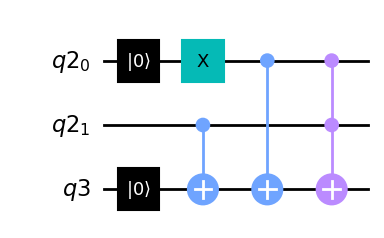

In [3]:
def new_var_func(a, b):
    a = True
    # Yes, we can create local variables
    c = a | b

qc = compile(new_var_func, 0)
qc.draw(output="mpl")

<qiskit.circuit.quantumregister.Qubit object at 0x7f11ac16e140> = <quantpiler.compiler.compile.<locals>.QueuedQubit object at 0x7f1152d34760> & <quantpiler.compiler.compile.<locals>.QueuedQubit object at 0x7f1152d37a90>


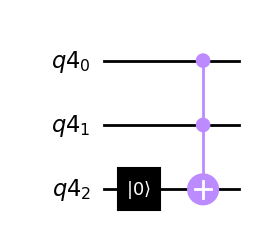

In [4]:
def and_func(a, b, c):
    c = a & b

qc = compile(and_func, 0)
qc.draw(output="mpl")

<qiskit.circuit.quantumregister.Qubit object at 0x7f1152e2b400> = <quantpiler.compiler.compile.<locals>.QueuedQubit object at 0x7f1152ddf1c0> | <quantpiler.compiler.compile.<locals>.QueuedQubit object at 0x7f1152ddd630>


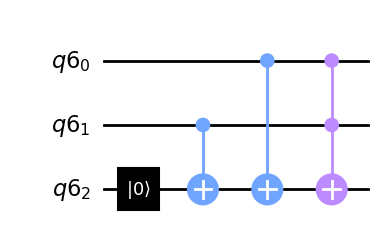

In [5]:
def or_func(a, b, c):
    c = a | b

qc = compile(or_func, 0)
qc.draw(output="mpl")

<qiskit.circuit.quantumregister.Qubit object at 0x7f1152c9d600> = <quantpiler.compiler.compile.<locals>.QueuedQubit object at 0x7f1152c67ca0> != <quantpiler.compiler.compile.<locals>.QueuedQubit object at 0x7f1152c66350>
<qiskit.circuit.quantumregister.Qubit object at 0x7f1152c9d600> = <qiskit.circuit.quantumregister.Qubit object at 0x7f1152e551c0>


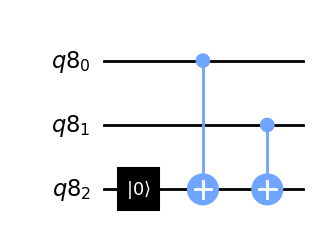

In [6]:
def xor_func(a, b, c):
    c = a != b

qc = compile(xor_func, 0)
qc.draw(output="mpl")

<qiskit.circuit.quantumregister.Qubit object at 0x7f1152b0db40> = <quantpiler.compiler.compile.<locals>.QueuedQubit object at 0x7f1152cf91b0> == <quantpiler.compiler.compile.<locals>.QueuedQubit object at 0x7f1152cfbee0>
<qiskit.circuit.quantumregister.Qubit object at 0x7f1152b0db40> = <qiskit.circuit.quantumregister.Qubit object at 0x7f1152d3a3c0>


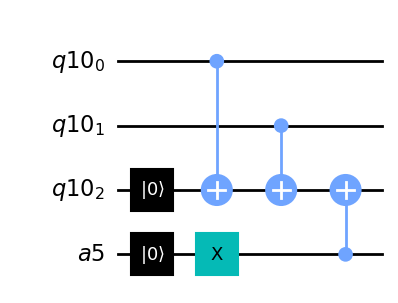

In [7]:
def equals_func(a, b, c):
    c = a == b

# For this operation we need 1 ancilla
qc = compile(equals_func, 1)
qc.draw(output="mpl")

## Complex function

<qiskit.circuit.quantumregister.Qubit object at 0x7f1152b45b40> = True
<qiskit.circuit.quantumregister.Qubit object at 0x7f1152b16cc0> = <quantpiler.compiler.compile.<locals>.QueuedQubit object at 0x7f1152ce3e80> | <quantpiler.compiler.compile.<locals>.QueuedQubit object at 0x7f1152ce3b80>
<qiskit.circuit.quantumregister.Qubit object at 0x7f1152d689c0> = <quantpiler.compiler.compile.<locals>.QueuedQubit object at 0x7f1152bccbe0> & <quantpiler.compiler.compile.<locals>.QueuedQubit object at 0x7f1152bcd510>
<qiskit.circuit.quantumregister.Qubit object at 0x7f11531810c0> = <quantpiler.compiler.compile.<locals>.QueuedBool object at 0x7f1152ce1e10> != <quantpiler.compiler.compile.<locals>.QueuedQubit object at 0x7f1152ce3e80>
<qiskit.circuit.quantumregister.AncillaQubit object at 0x7f1152d48900> = False
<qiskit.circuit.quantumregister.Qubit object at 0x7f11531810c0> = <qiskit.circuit.quantumregister.Qubit object at 0x7f1152d689c0>


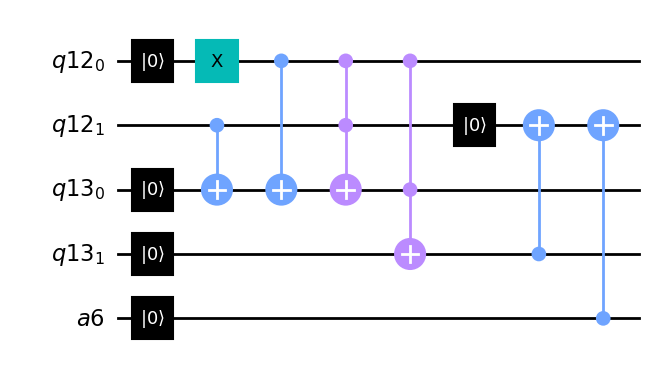

In [8]:
def example_func(a, b):
    a = True
    a_or_b = a | b
    tmp = a & a_or_b
    b = tmp != False

qc = compile(example_func, 1)
qc.draw(output="mpl")

## Very complex function

<qiskit.circuit.quantumregister.Qubit object at 0x7f1152aa1280> = True
<qiskit.circuit.quantumregister.Qubit object at 0x7f1152aa2700> = not <quantpiler.compiler.compile.<locals>.QueuedQubit object at 0x7f1152a7fc10>
<qiskit.circuit.quantumregister.Qubit object at 0x7f1152aa1f00> = not <quantpiler.compiler.compile.<locals>.QueuedQubit object at 0x7f1152a7dc00>
<qiskit.circuit.quantumregister.Qubit object at 0x7f1152aa32c0> = <quantpiler.compiler.compile.<locals>.QueuedQubit object at 0x7f1152a7d720> | <quantpiler.compiler.compile.<locals>.QueuedQubit object at 0x7f1152a7ece0>
<qiskit.circuit.quantumregister.Qubit object at 0x7f1152aa3c40> = <quantpiler.compiler.compile.<locals>.QueuedOr object at 0x7f1152a7da20> & <quantpiler.compiler.compile.<locals>.QueuedQubit object at 0x7f1152a7d690>
<qiskit.circuit.quantumregister.AncillaQubit object at 0x7f1152af1040> = <quantpiler.compiler.compile.<locals>.QueuedEqual object at 0x7f1152a7e170> | <quantpiler.compiler.compile.<locals>.QueuedQubit

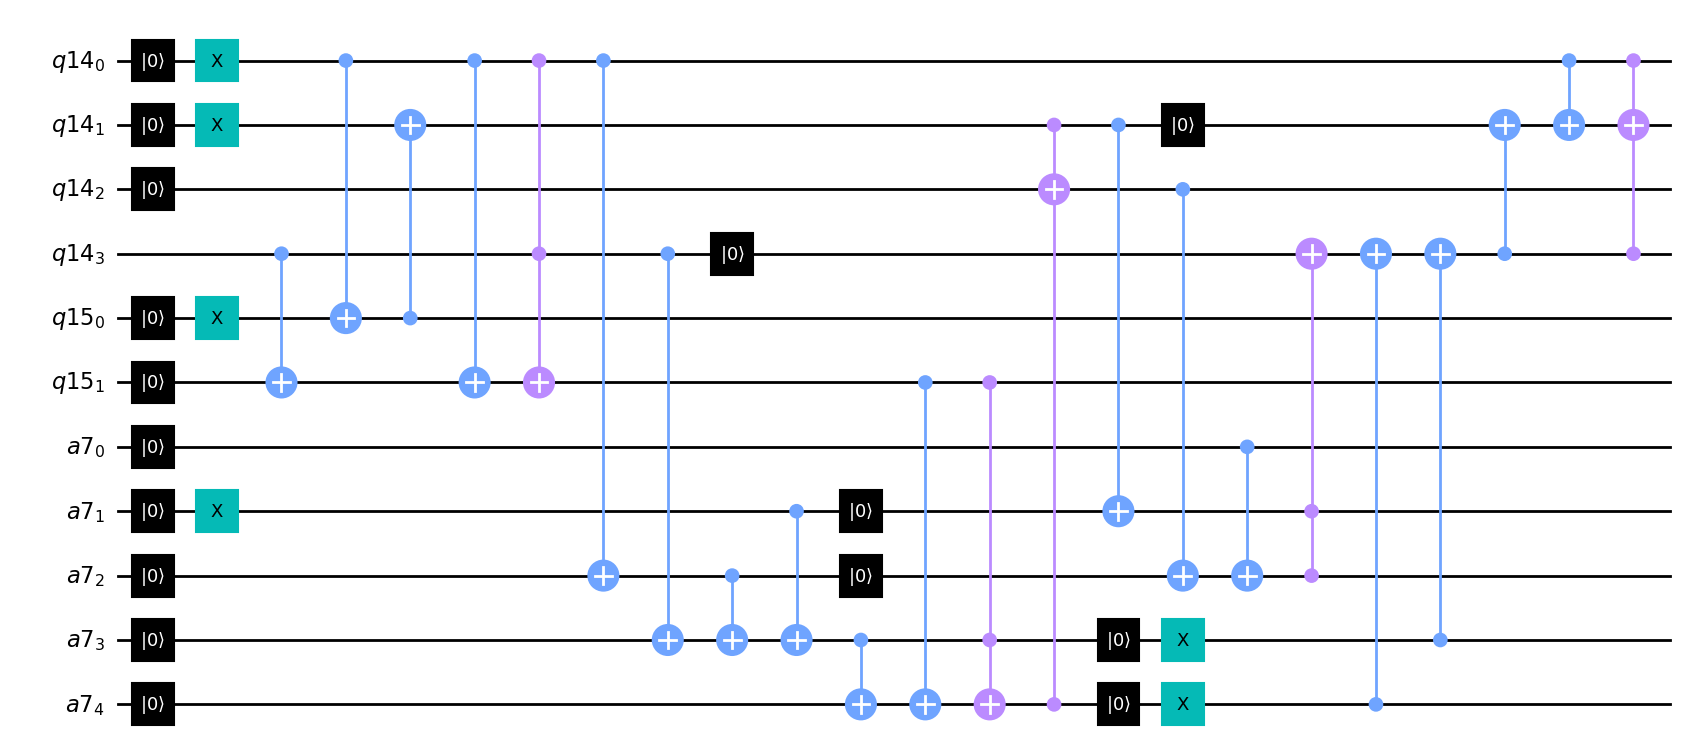

In [9]:
def complex_func(a, b, c, d):
        a = True
        not_a = not a
        b = not not_a
        a_or_d = a | d
        c = b & (a_or_d | (d == a))
        d = (c != False) & b == True
        b = a | d

qc = compile(complex_func, 5)
qc.draw(output="mpl")